In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, r2_score, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

Импортируем датасет

In [76]:
df = pd.read_csv(r'C:\Users\shang\Desktop\GeekBrains\Интенсив\Библиотеки\survey lung cancer.csv')

In [77]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


Производим подготовку данных

In [78]:
df['GENDER'] = df['GENDER'].replace({'M': 'Male', 'F': 'Female'})
df = df.sort_values(by=['AGE'])
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 2, 'NO': 1})
df = df.reset_index(drop=True)

In [79]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Female,21,2,1,1,1,2,2,2,1,1,1,2,1,1,1
1,Female,38,1,2,1,1,2,2,2,2,1,2,2,1,2,2
2,Male,39,2,1,1,2,1,2,2,2,2,1,2,1,2,2
3,Female,44,2,2,2,2,2,2,1,1,1,1,2,2,1,2
4,Male,44,1,2,1,2,2,2,1,2,1,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Male,78,1,2,1,2,2,2,1,2,1,1,2,2,2,2
305,Male,79,2,1,1,1,2,2,2,1,2,2,2,2,2,2
306,Female,81,1,2,2,2,2,2,2,2,1,2,2,2,2,2
307,Female,81,1,1,1,2,2,1,2,1,2,2,2,1,1,2


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [81]:
df.size

4944

<AxesSubplot:>

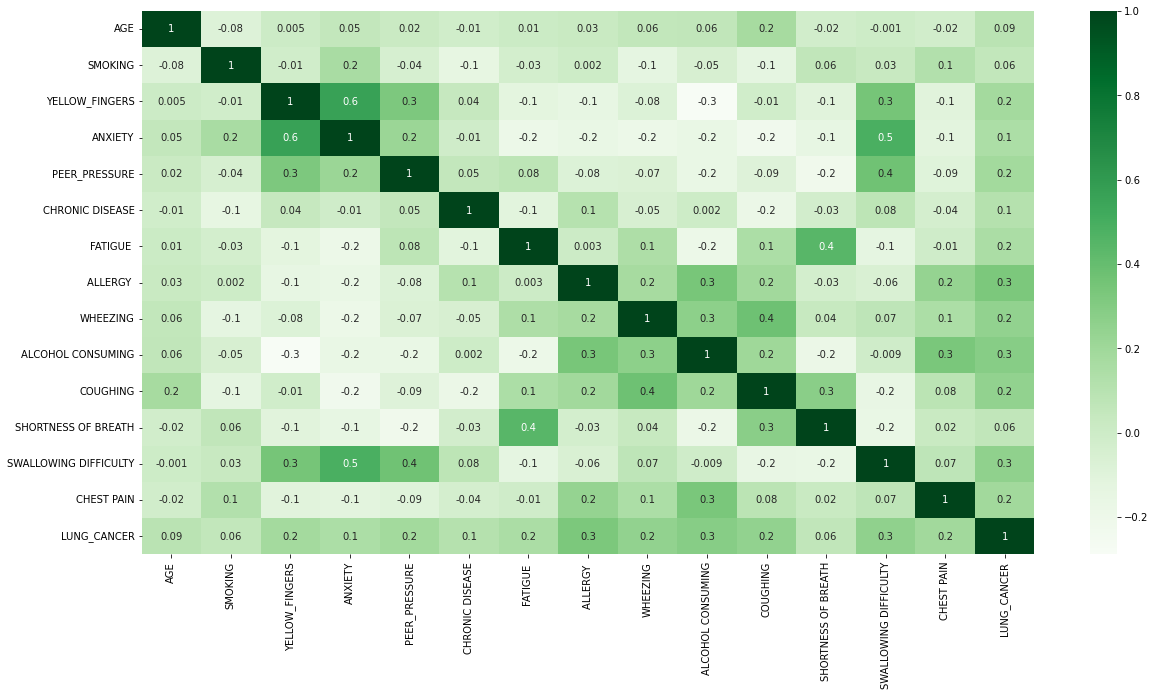

In [152]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True, fmt='.1g')

In [83]:
lung_cancer = df[['GENDER', 'LUNG_CANCER']]
lung_cancer = lung_cancer.sort_values(by=['LUNG_CANCER'])
lung_cancer = lung_cancer.reset_index(drop=True)

In [84]:
lung_cancer

,GENDER,LUNG_CANCER
0,Female,1
1,Female,1
2,Female,1
3,Male,1
4,Male,1
...,...,...
304,Female,2
305,Female,2
306,Female,2
307,Female,2


In [85]:
lung_cancer.value_counts()

GENDER  LUNG_CANCER
Male    2              145
Female  2              125
        1               22
Male    1               17
dtype: int64

Определяем данные, которые будут использоваться для анализа и в качестве целевых значений

In [86]:
target = pd.DataFrame(data=df.LUNG_CANCER)
feature_names = df.iloc[:, 1:15]
x = feature_names
y = target

Разбиваем нашу выборку на обучающую и тестовую

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

Логистическая регрессия

In [88]:
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(x_train, y_train.values.ravel())
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

Коэффициент детерминации для обучающей выборки

In [91]:
r2_score(y_train, pred_train)

0.3346801346801347

Коэффициент детерминации для тестовой выборки

In [93]:
r2_score(y_test, pred_test)

0.27666666666666684

Посмотрим на значение метрики accuracy

In [94]:
accuracy_score(y_train, pred_train)

0.9352226720647774

In [96]:
accuracy_score(y_test, pred_test)

0.8870967741935484

In [ ]:
Посмотрим на значение MSE

In [95]:
mean_squared_error(y_train, pred_train)

0.03643724696356275

In [97]:
mean_squared_error(y_test, pred_test)

0.11290322580645161

Метрики accuracy и MSE получили довольно удовлетворительные значения, но метрика accurace малоинформативно в случае с массивом данных, где есть дисбаланс классов. Значение коэффициентов детерминации нам это доказывают. Попробуем стандартизировать данные и повторим рассчеты.

In [54]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

Приведем полученные данные в более информативную форму

In [46]:
x_train_std = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_train_std

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,-1.998139,0.767948,0.968246,-1.032796,1.216553,1.066739,0.74162,1.032796,0.968246,-1.032796,1.0,0.767948,-0.907485,-0.87831
1,-0.932465,0.767948,-1.032796,-1.032796,-0.821995,-0.937437,0.74162,-0.968246,-1.032796,-1.032796,-1.0,-1.302172,-0.907485,-0.87831
2,-0.399628,-1.302172,0.968246,0.968246,1.216553,1.066739,-1.34840,1.032796,0.968246,0.968246,1.0,0.767948,1.101946,-0.87831
3,-0.399628,0.767948,-1.032796,-1.032796,1.216553,1.066739,0.74162,1.032796,0.968246,0.968246,1.0,0.767948,1.101946,1.13855
4,0.399628,0.767948,0.968246,0.968246,1.216553,1.066739,-1.34840,-0.968246,-1.032796,-1.032796,-1.0,-1.302172,-0.907485,-0.87831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1.065674,-1.302172,-1.032796,-1.032796,1.216553,1.066739,-1.34840,1.032796,-1.032796,0.968246,1.0,0.767948,-0.907485,-0.87831
243,0.266419,-1.302172,0.968246,0.968246,1.216553,-0.937437,-1.34840,1.032796,-1.032796,0.968246,-1.0,-1.302172,1.101946,1.13855
244,-0.266419,0.767948,-1.032796,-1.032796,-0.821995,-0.937437,0.74162,1.032796,0.968246,0.968246,1.0,0.767948,-0.907485,1.13855
245,-0.932465,0.767948,-1.032796,-1.032796,1.216553,1.066739,0.74162,1.032796,0.968246,0.968246,-1.0,-1.302172,1.101946,1.13855


Посмотрим на средние значения(mean) и стандартное отклонения(std) 

In [50]:
x_train_std.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,0.112176,-0.170730,0.133803,-0.044427,0.250925,0.093050,0.073152,0.182150,0.101398,0.101398,0.198381,0.030415,0.044351,0.305677
std,1.114924,1.032655,0.988644,1.002478,1.019928,1.003719,0.976793,0.991240,0.993564,0.993564,0.982115,0.993389,1.005360,0.995048
min,-5.461579,-1.302172,-1.032796,-1.032796,-0.821995,-0.937437,-1.348400,-0.968246,-1.032796,-1.032796,-1.000000,-1.302172,-0.907485,-0.878310
25%,-0.532837,-1.302172,-1.032796,-1.032796,-0.821995,-0.937437,-1.348400,-0.968246,-1.032796,-1.032796,-1.000000,-1.302172,-0.907485,-0.878310
50%,0.000000,0.767948,0.968246,-1.032796,1.216553,1.066739,0.741620,1.032796,0.968246,0.968246,1.000000,0.767948,-0.907485,1.138550
75%,0.932465,0.767948,0.968246,0.968246,1.216553,1.066739,0.741620,1.032796,0.968246,0.968246,1.000000,0.767948,1.101946,1.138550
max,3.330231,0.767948,0.968246,0.968246,1.216553,1.066739,0.741620,1.032796,0.968246,0.968246,1.000000,0.767948,1.101946,1.138550


Наши значения mean стали очень близки к нулю, а std в районе единицы

Далее стандартизируем тестовые данные

In [55]:
x_test_std = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)
x_test_std.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,-0.100818,0.165667,-0.135615,0.044407,-0.246522,-0.092894,-0.075042,-0.184133,-0.102262,-0.102262,-0.202403,-0.030680,-0.044204,-0.307822
std,0.906080,0.978265,1.021814,1.007713,0.990473,1.006467,1.034211,1.019138,1.016754,1.016754,1.028607,1.016933,1.004824,1.015238
min,-2.016352,-1.097888,-1.182395,-0.987927,-1.054093,-1.028753,-1.458281,-1.162919,-1.143858,-1.143858,-1.222681,-1.344179,-0.948683,-1.192296
25%,-0.819143,-1.097888,-1.182395,-0.987927,-1.054093,-1.028753,-1.458281,-1.162919,-1.143858,-1.143858,-1.222681,-1.344179,-0.948683,-1.192296
50%,-0.100818,0.910840,0.845741,1.012220,-1.054093,-1.028753,0.685739,-1.162919,0.874234,0.874234,-0.202403,0.743948,-0.948683,-1.192296
75%,0.587578,0.910840,0.845741,1.012220,0.948683,0.972050,0.685739,0.859905,0.874234,0.874234,0.817875,0.743948,1.054093,0.838718
max,1.814717,0.910840,0.845741,1.012220,0.948683,0.972050,0.685739,0.859905,0.874234,0.874234,0.817875,0.743948,1.054093,0.838718


In [58]:
model_std = LogisticRegression(solver='lbfgs', max_iter=200)
model_std.fit(x_train_std, y_train.values.ravel())

LogisticRegression(max_iter=200)

In [57]:
pred_train_std = model_std.predict(x_train_std)
pred_test_std = model_std.predict(x_test_std)

In [63]:
r2_score(y_train, pred_train_std) 

0.6257575757575757

In [64]:
r2_score(y_test, pred_test_std) 

0.3800000000000001

In [65]:
accuracy_score(y_train, pred_train_std)

0.9635627530364372

In [66]:
accuracy_score(y_test, pred_test_std)

0.9032258064516129

In [98]:
mean_squared_error(y_train, pred_train_std)

0.03643724696356275

In [99]:
mean_squared_error(y_test, pred_test_std)

0.0967741935483871

Получили результаты лучше, но на тестовой выборке значение детерминации не вызывает доверие. Попробуем изучить другие модели

In [67]:
model_tree_reg = DecisionTreeRegressor(random_state=1)
model_tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [102]:
tree_train_reg = model_tree_reg.predict(x_train)
tree_test_reg = model_tree_reg.predict(x_test)

In [103]:
r2_score(y_train, tree_train_reg)

0.9792087542087542

In [107]:
r2_score(y_test, tree_test_reg)

0.07000000000000017

In [109]:
mean_squared_error(y_train, tree_train_reg)


0.0020242914979757085

In [110]:
mean_squared_error(y_test, tree_test_reg)

0.14516129032258066

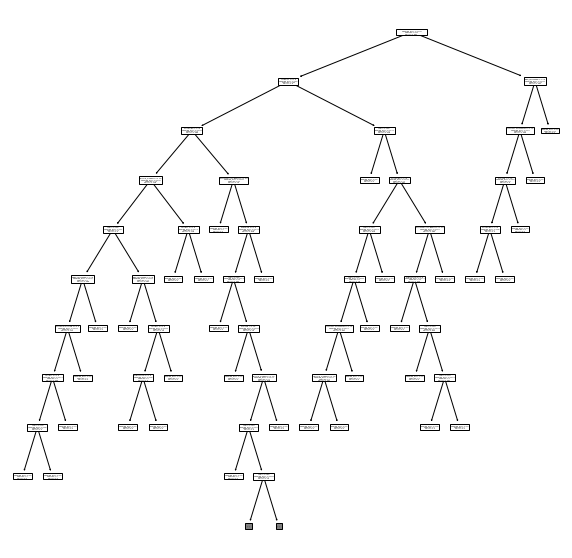

In [73]:
plt.figure(figsize=(10, 10))
plot_tree(model_tree_reg, max_depth=9, filled=False, feature_names=x_train.columns);

Дерево решений по регрессии также заставляет задумываться. Попробуем использовать модель-классификатор

In [111]:
model_tree_clas = DecisionTreeClassifier(random_state=1)
model_tree_clas.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [114]:
tree_train_clas = model_tree_clas.predict(x_train)
tree_test_clas = model_tree_clas.predict(x_test)

In [174]:
cr_train = pd.DataFrame(classification_report(y_train, tree_train_clas, output_dict=True))
cr_train = cr_train.transpose()

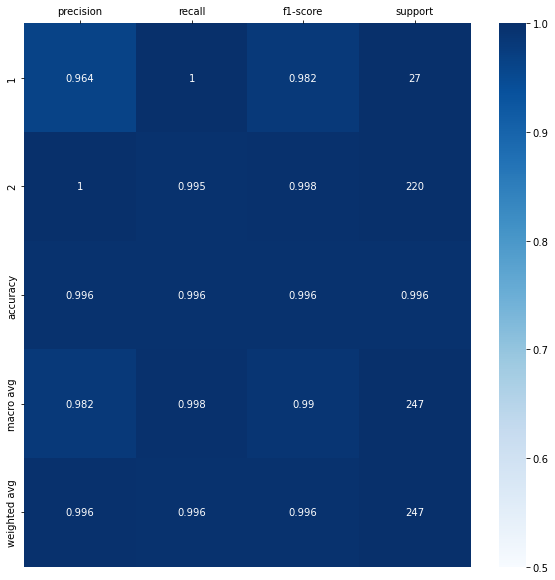

In [182]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(cr_train, vmin=0.5, vmax=1, annot=True, fmt='.3g', cmap='Blues') 
ax.xaxis.tick_top()

In [177]:
cr_test = pd.DataFrame(classification_report(y_test, tree_test_clas, output_dict=True))
cr_test = cr_test.transpose()

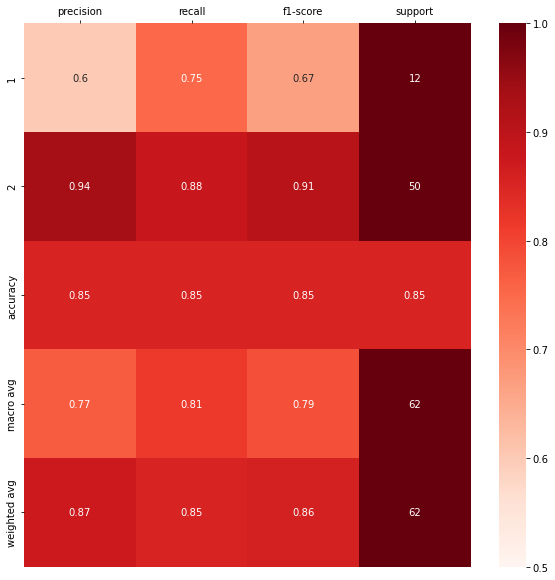

In [185]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(cr_test, vmin=0.5, vmax=1, annot=True, cmap='Reds')    
ax.xaxis.tick_top()

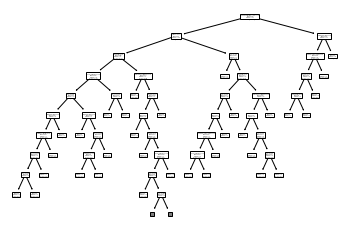

In [121]:
plt.Figure(figsize=(10, 10))
plot_tree(model_tree_clas, max_depth=9, filled=False, feature_names=x_train.columns);

Резюмируя все данные выше:
Данные имею явный дисбаланс, поэтому метрика accuracy малоинформативна и будет в данном случае бесполезна;
Больше всего подходит модель дерева классификации(из тех что были рассмотрены здесь);
Данные коэффициента детерминации по регрессионным моделям говорят о большом разбросе значений относительно среднего;
Сама задача является по своей сути регрессионной;
Рекомендуется скорректировать данные и проверить больше регрессионных моделей